# Logistic Regression 

We will use the MNIST Handwritten digit database in the sci-kit learn library to predict Handwritten digit.

In [99]:
#load libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [100]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [101]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , X.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Target Data Shape", y.shape)

Image Data Shape (1797, 64)
Target Data Shape (1797,)


### Visualizing the Images and targets in our Dataset

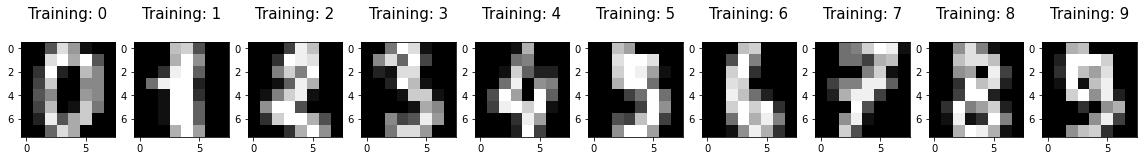

In [102]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
  plt.subplot(1, 10, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 15)

## Split the Data

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

### Instantiate Logistic Regression

In [104]:
LR_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
# fit the model
LR_model.fit(X_train,y_train)

LogisticRegression(max_iter=150, multi_class='ovr', n_jobs=1,
                   solver='liblinear')

### Prediction

In [97]:
# Predict labels for all test data
y_pred = LR_model.predict(X_test)
y_pred= y_pred.reshape(-1,1)

### Model Performance 

The model performance based on number of correct predictions / total number of data points. 


In [98]:
score = LR_model.score(X_test, y_test)
print(score)

0.9533333333333334


### Confusion Matrix

A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [95]:
cm = metrics.confusion_matrix(y_test, y_pred)

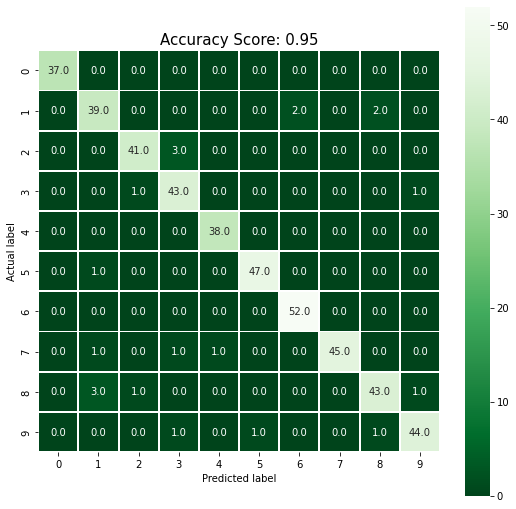

In [96]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.9, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}'.format(score)
plt.title(all_sample_title, size = 15);

### Display Mispredicted Targets

In [27]:
#mispred=[]
#actual_lst =[]
#for actual,pred in zip(y_test,y_pred):
#  if actual != pred:
#    mispred.append(pred)
#    actual_lst.append(actual)


In [57]:

#plt.figure(figsize=(20,4))
#for plotIndex, (wrong,only) in enumerate(zip(mispred[0:5],actual_lst[0:5])):
#    print(wrong)
#    plt.subplot(1, 5, plotIndex + 1)
#    plt.imshow(np.reshape(X_test.find(wrong[0]), (8,8)), cmap=plt.cm.gray)
#    plt.title('Predicted: {}, Actual: {}'.format(wrong[0], only), fontsize = 10)

In [106]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(y_pred, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

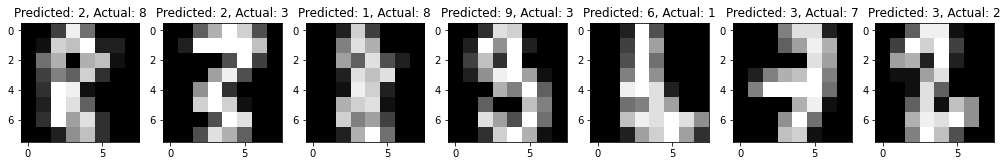

In [107]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[-7:]):
  plt.subplot(1, 8, plotIndex + 1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(y_pred[wrong][0], y_test[wrong]), fontsize = 12)

The dataset contains 1797 examples handwritten data. A score of 95% is a good score.